In [1]:
import subprocess
import sys

subprocess.check_call([sys.executable, "-m", "pip", "install", "diffusers"])

import os
import torch
import numpy as np
import rioxarray as rxr
import matplotlib.pyplot as plt
from terratorch import FULL_MODEL_REGISTRY
from plotting_utils import plot_modality

c:\Users\MSI\.platformio\penv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import os
import torch
import numpy as np
import rioxarray as rxr
import matplotlib.pyplot as plt
from terratorch import FULL_MODEL_REGISTRY
from plotting_utils import plot_modality

# Select device
if torch.cuda.is_available():
    device = 'cuda'    
elif torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'

In [4]:
# Load input data
examples = [
    '38D_378R_2_3.tif',
    '282D_485L_3_3.tif',
    '433D_629L_3_1.tif',
    '637U_59R_1_3.tif',
    '609U_541L_3_0.tif',
]

# Select example between 0 and 4
file = examples[1]

# Define modalities
modalities = ['S2L2A', 'S1RTC', 'DEM', 'LULC', 'NDVI']
data = {m: rxr.open_rasterio(f'../examples/{m}/{file}') for m in modalities}
# Tensor with shape [B, C, 224, 224]
data = {
    k: torch.Tensor(v.values, device='cpu').unsqueeze(0)
    for k, v in data.items()
}

In [5]:
%pip install diffusers

   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.1 MB ? eta -:--:--
   ------- -------------------------------- 0.8/4.1 MB 2.1 MB/s eta 0:00:02
   ------------ --------------------------- 1.3/4.1 MB 2.2 MB/s eta 0:00:02
   --------------- ------------------------ 1.6/4.1 MB 2.3 MB/s eta 0:00:02
   -------------------- ------------------- 2.1/4.1 MB 2.1 MB/s eta 0:00:01
   ---------------------- ----------------- 2.4/4.1 MB 2.1 MB/s eta 0:00:01
   --------------------------- ------------ 2.9/4.1 MB 2.2 MB/s eta 0:00:01
   --------------------------------- ------ 3.4/4.1 MB 2.2 MB/s eta 0:00:01
   -------------------------------------- - 3.9/4.1 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 4.1/4.1 MB 2.2 MB/s  0:00:01

   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [importlib_metadata]
   ------------------------------ --------- 3/4 [diffus


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Sprawdź dostępne modele Terramind
print("Dostępne modele:")
for name in FULL_MODEL_REGISTRY:
    if 'terramind' in name.lower():
        print(f"  - {name}")


Dostępne modele:
  - terratorch_terramind_v1_tokenizer_s2l2a
  - terratorch_terramind_v1_tokenizer_s1rtc
  - terratorch_terramind_v1_tokenizer_s1grd
  - terratorch_terramind_v1_tokenizer_dem
  - terratorch_terramind_v1_tokenizer_lulc
  - terratorch_terramind_v1_tokenizer_ndvi
  - terratorch_terramind_v01_tokenizer_s2l2a
  - terratorch_terramind_v01_tokenizer_s1grd
  - terratorch_terramind_v01_tokenizer_dem
  - terratorch_terramind_v01_tokenizer_lulc
  - terratorch_terramind_v1_base_encdec
  - terratorch_terramind_v1_large_encdec
  - terratorch_terramind_v01_base_generate
  - terratorch_terramind_v1_base_generate
  - terratorch_terramind_v1_large_generate
  - terratorch_terramind_v1_tiny_encdec
  - terratorch_terramind_v1_tiny_generate
  - terratorch_terramind_v1_small_encdec
  - terratorch_terramind_v1_small_generate


In [6]:
# Run any-to-any generation (this can take a while without a GPU, consider reducing timesteps for faster inference)
outputs = {}
for m in modalities:
    print(f'Processing {m}')
    out_modalities = modalities[:]
    out_modalities.remove(m)
    
    # Init model
    print(FULL_MODEL_REGISTRY.items())
    model = FULL_MODEL_REGISTRY.build(
        'terramind_v1_base_generate',
        modalities=[m],
        output_modalities=out_modalities,
        pretrained=True,
        standardize=True,
    )
    _ = model.to(device)
    
    input = data[m].clone().to(device)
    with torch.no_grad():
      generated = model(input, verbose=True, timesteps=10)
    outputs[m] = generated





# Sprawdź dostępne modele Terramind
# Alternatywnie:



# model_variants = ['terramind_v1_small', 'terramind_v1_medium', 'terramind_v1_large']
# outputs = {}

# for model_name in model_variants:
#     print(f'\n=== Processing with {model_name} ===')
#     outputs[model_name] = {}
    
#     for m in modalities:
#         print(f'Processing {m}')
#         out_modalities = modalities[:]
#         out_modalities.remove(m)
        
#         # Init model
#         model = FULL_MODEL_REGISTRY.build(
#             model_name,
#             modalities=[m],
#             output_modalities=out_modalities,
#             pretrained=True,
#             standardize=True,
#         )
#         _ = model.to(device)
        
#         input = data[m].clone().to(device)
#         with torch.no_grad():
#             generated = model(input, verbose=True, timesteps=10)
#         outputs[model_name][m] = generated

Processing S2L2A
ItemsView(MultiSourceRegistry(terratorch=Registry({'prithvi_eo_v1_100_mae': <function prithvi_eo_v1_100_mae at 0x00000204CEA01BC0>, 'prithvi_eo_v2_tiny_tl_mae': <function prithvi_eo_v2_tiny_tl_mae at 0x00000204CEA01C60>, 'prithvi_eo_v2_100_tl_mae': <function prithvi_eo_v2_100_tl_mae at 0x00000204CEA01D00>, 'prithvi_eo_v2_300_mae': <function prithvi_eo_v2_300_mae at 0x00000204CEA01DA0>, 'prithvi_eo_v2_300_tl_mae': <function prithvi_eo_v2_300_tl_mae at 0x00000204CEA01E40>, 'prithvi_eo_v2_600_mae': <function prithvi_eo_v2_600_mae at 0x00000204CEA01EE0>, 'prithvi_eo_v2_600_tl_mae': <function prithvi_eo_v2_600_tl_mae at 0x00000204CEA01F80>, 'terramind_v1_tokenizer_s2l2a': <function terramind_v1_tokenizer_s2l2a at 0x00000204D3B91440>, 'terramind_v1_tokenizer_s1rtc': <function terramind_v1_tokenizer_s1rtc at 0x00000204D3B914E0>, 'terramind_v1_tokenizer_s1grd': <function terramind_v1_tokenizer_s1grd at 0x00000204D3B91580>, 'terramind_v1_tokenizer_dem': <function terramind_v1_t

INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-S1RTC/resolve/main/TerraMind_Tokenizer_S1RTC.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-DEM/resolve/main/TerraMind_Tokenizer_DEM.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-LULC/resolve/main/TerraMind_Tokenizer_LULC.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-NDVI/resolve/main/TerraMind_Tokenizer_NDVI.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-base/resolve/main/TerraMind_v1_base.pt "HTTP/1.1 302 Found"
100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


Processing S1RTC
ItemsView(MultiSourceRegistry(terratorch=Registry({'prithvi_eo_v1_100_mae': <function prithvi_eo_v1_100_mae at 0x00000204CEA01BC0>, 'prithvi_eo_v2_tiny_tl_mae': <function prithvi_eo_v2_tiny_tl_mae at 0x00000204CEA01C60>, 'prithvi_eo_v2_100_tl_mae': <function prithvi_eo_v2_100_tl_mae at 0x00000204CEA01D00>, 'prithvi_eo_v2_300_mae': <function prithvi_eo_v2_300_mae at 0x00000204CEA01DA0>, 'prithvi_eo_v2_300_tl_mae': <function prithvi_eo_v2_300_tl_mae at 0x00000204CEA01E40>, 'prithvi_eo_v2_600_mae': <function prithvi_eo_v2_600_mae at 0x00000204CEA01EE0>, 'prithvi_eo_v2_600_tl_mae': <function prithvi_eo_v2_600_tl_mae at 0x00000204CEA01F80>, 'terramind_v1_tokenizer_s2l2a': <function terramind_v1_tokenizer_s2l2a at 0x00000204D3B91440>, 'terramind_v1_tokenizer_s1rtc': <function terramind_v1_tokenizer_s1rtc at 0x00000204D3B914E0>, 'terramind_v1_tokenizer_s1grd': <function terramind_v1_tokenizer_s1grd at 0x00000204D3B91580>, 'terramind_v1_tokenizer_dem': <function terramind_v1_t

INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-S2L2A/resolve/main/TerraMind_Tokenizer_S2L2A.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-DEM/resolve/main/TerraMind_Tokenizer_DEM.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-LULC/resolve/main/TerraMind_Tokenizer_LULC.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-NDVI/resolve/main/TerraMind_Tokenizer_NDVI.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-base/resolve/main/TerraMind_v1_base.pt "HTTP/1.1 302 Found"
100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


Processing DEM
ItemsView(MultiSourceRegistry(terratorch=Registry({'prithvi_eo_v1_100_mae': <function prithvi_eo_v1_100_mae at 0x00000204CEA01BC0>, 'prithvi_eo_v2_tiny_tl_mae': <function prithvi_eo_v2_tiny_tl_mae at 0x00000204CEA01C60>, 'prithvi_eo_v2_100_tl_mae': <function prithvi_eo_v2_100_tl_mae at 0x00000204CEA01D00>, 'prithvi_eo_v2_300_mae': <function prithvi_eo_v2_300_mae at 0x00000204CEA01DA0>, 'prithvi_eo_v2_300_tl_mae': <function prithvi_eo_v2_300_tl_mae at 0x00000204CEA01E40>, 'prithvi_eo_v2_600_mae': <function prithvi_eo_v2_600_mae at 0x00000204CEA01EE0>, 'prithvi_eo_v2_600_tl_mae': <function prithvi_eo_v2_600_tl_mae at 0x00000204CEA01F80>, 'terramind_v1_tokenizer_s2l2a': <function terramind_v1_tokenizer_s2l2a at 0x00000204D3B91440>, 'terramind_v1_tokenizer_s1rtc': <function terramind_v1_tokenizer_s1rtc at 0x00000204D3B914E0>, 'terramind_v1_tokenizer_s1grd': <function terramind_v1_tokenizer_s1grd at 0x00000204D3B91580>, 'terramind_v1_tokenizer_dem': <function terramind_v1_tok

INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-S2L2A/resolve/main/TerraMind_Tokenizer_S2L2A.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-S1RTC/resolve/main/TerraMind_Tokenizer_S1RTC.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-LULC/resolve/main/TerraMind_Tokenizer_LULC.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-NDVI/resolve/main/TerraMind_Tokenizer_NDVI.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-base/resolve/main/TerraMind_v1_base.pt "HTTP/1.1 302 Found"
100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


Processing LULC
ItemsView(MultiSourceRegistry(terratorch=Registry({'prithvi_eo_v1_100_mae': <function prithvi_eo_v1_100_mae at 0x00000204CEA01BC0>, 'prithvi_eo_v2_tiny_tl_mae': <function prithvi_eo_v2_tiny_tl_mae at 0x00000204CEA01C60>, 'prithvi_eo_v2_100_tl_mae': <function prithvi_eo_v2_100_tl_mae at 0x00000204CEA01D00>, 'prithvi_eo_v2_300_mae': <function prithvi_eo_v2_300_mae at 0x00000204CEA01DA0>, 'prithvi_eo_v2_300_tl_mae': <function prithvi_eo_v2_300_tl_mae at 0x00000204CEA01E40>, 'prithvi_eo_v2_600_mae': <function prithvi_eo_v2_600_mae at 0x00000204CEA01EE0>, 'prithvi_eo_v2_600_tl_mae': <function prithvi_eo_v2_600_tl_mae at 0x00000204CEA01F80>, 'terramind_v1_tokenizer_s2l2a': <function terramind_v1_tokenizer_s2l2a at 0x00000204D3B91440>, 'terramind_v1_tokenizer_s1rtc': <function terramind_v1_tokenizer_s1rtc at 0x00000204D3B914E0>, 'terramind_v1_tokenizer_s1grd': <function terramind_v1_tokenizer_s1grd at 0x00000204D3B91580>, 'terramind_v1_tokenizer_dem': <function terramind_v1_to

INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-LULC/resolve/main/TerraMind_Tokenizer_LULC.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-S2L2A/resolve/main/TerraMind_Tokenizer_S2L2A.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-S1RTC/resolve/main/TerraMind_Tokenizer_S1RTC.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-DEM/resolve/main/TerraMind_Tokenizer_DEM.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-NDVI/resolve/main/TerraMind_Tokenizer_NDVI.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-base/resolve/main/TerraMind_v1_base.pt "HTTP/1.1 302 Found"
100%|██████████| 10/10 [00:07<00:00, 

Processing NDVI
ItemsView(MultiSourceRegistry(terratorch=Registry({'prithvi_eo_v1_100_mae': <function prithvi_eo_v1_100_mae at 0x00000204CEA01BC0>, 'prithvi_eo_v2_tiny_tl_mae': <function prithvi_eo_v2_tiny_tl_mae at 0x00000204CEA01C60>, 'prithvi_eo_v2_100_tl_mae': <function prithvi_eo_v2_100_tl_mae at 0x00000204CEA01D00>, 'prithvi_eo_v2_300_mae': <function prithvi_eo_v2_300_mae at 0x00000204CEA01DA0>, 'prithvi_eo_v2_300_tl_mae': <function prithvi_eo_v2_300_tl_mae at 0x00000204CEA01E40>, 'prithvi_eo_v2_600_mae': <function prithvi_eo_v2_600_mae at 0x00000204CEA01EE0>, 'prithvi_eo_v2_600_tl_mae': <function prithvi_eo_v2_600_tl_mae at 0x00000204CEA01F80>, 'terramind_v1_tokenizer_s2l2a': <function terramind_v1_tokenizer_s2l2a at 0x00000204D3B91440>, 'terramind_v1_tokenizer_s1rtc': <function terramind_v1_tokenizer_s1rtc at 0x00000204D3B914E0>, 'terramind_v1_tokenizer_s1grd': <function terramind_v1_tokenizer_s1grd at 0x00000204D3B91580>, 'terramind_v1_tokenizer_dem': <function terramind_v1_to

INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-NDVI/resolve/main/TerraMind_Tokenizer_NDVI.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-S2L2A/resolve/main/TerraMind_Tokenizer_S2L2A.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-S1RTC/resolve/main/TerraMind_Tokenizer_S1RTC.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-DEM/resolve/main/TerraMind_Tokenizer_DEM.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-Tokenizer-LULC/resolve/main/TerraMind_Tokenizer_LULC.pt "HTTP/1.1 302 Found"
INFO:httpx:HTTP Request: HEAD https://huggingface.co/ibm-esa-geospatial/TerraMind-1.0-base/resolve/main/TerraMind_v1_base.pt "HTTP/1.1 302 Found"
100%|██████████| 10/10 [00:07<00:00, 

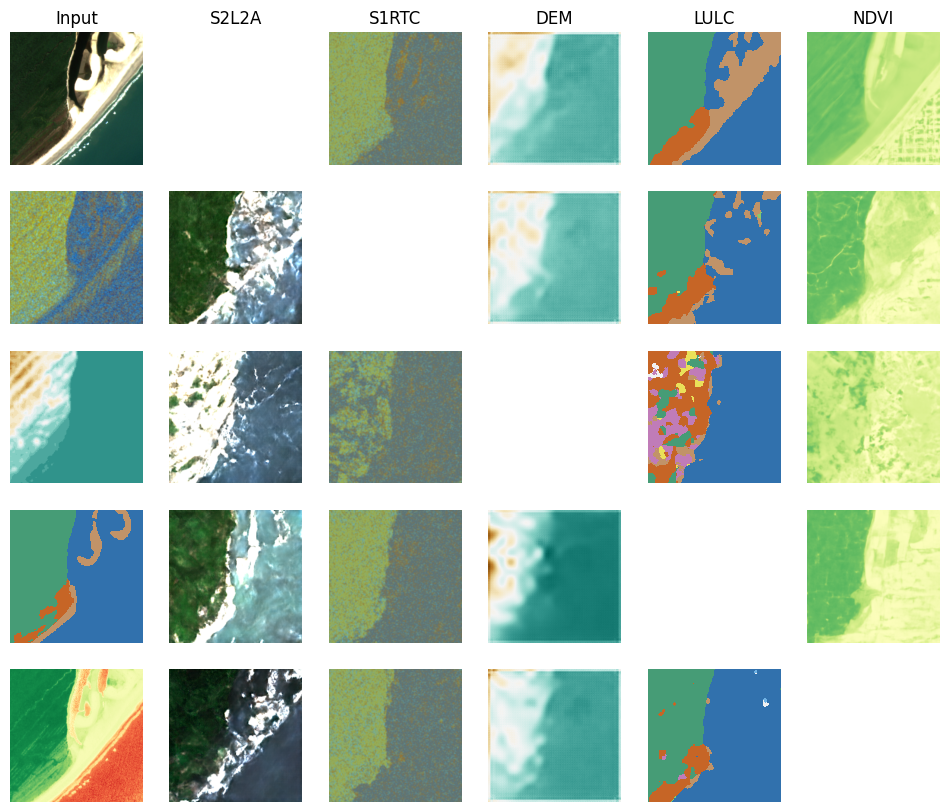

In [7]:
# Plot any-to-any generations
n_mod = len(modalities)
fig, axes = plt.subplots(nrows=n_mod, ncols=n_mod + 1, figsize=[12, 10])
axes[0][0].set_title('Input')
for i, m in enumerate(modalities):
    axes[0][i + 1].set_title(m)

for (m, input), ax in zip(data.items(), axes):
    plot_modality(m, input, ax=ax[0])
    for a in ax:
        a.axis('off')

for k, m_output in enumerate(outputs.values()):
    for m, out in m_output.items():        
        j = modalities.index(m) + 1
        plot_modality(m, out, ax=axes[k][j])
        
plt.savefig(f'any_to_any_{os.path.basename(file)}.pdf')
plt.show()

In [8]:
# Sprawdź jakie klasy rzeczywiście generuje model
lulc_data = outputs['S2L2A']['LULC']
lulc_np = lulc_data.squeeze().cpu().numpy()

if lulc_np.ndim == 3:
    lulc_np = lulc_np.argmax(axis=0)

# Wyświetl unikalne wartości (klasy)
unique_classes = np.unique(lulc_np)
print(f"Klasy obecne w mapie LULC: {unique_classes}")
print(f"Liczba klas: {len(unique_classes)}")

# Sprawdź rozkład klas
print("\nRozkład klas:")
for class_id in unique_classes:
    count = np.sum(lulc_np == class_id)
    percentage = (count / lulc_np.size) * 100
    print(f"  Klasa {class_id}: {count} pikseli ({percentage:.2f}%)")

Klasy obecne w mapie LULC: [1 2 6 9]
Liczba klas: 4

Rozkład klas:
  Klasa 1: 19356 pikseli (38.58%)
  Klasa 2: 16980 pikseli (33.84%)
  Klasa 6: 9914 pikseli (19.76%)
  Klasa 9: 3926 pikseli (7.82%)


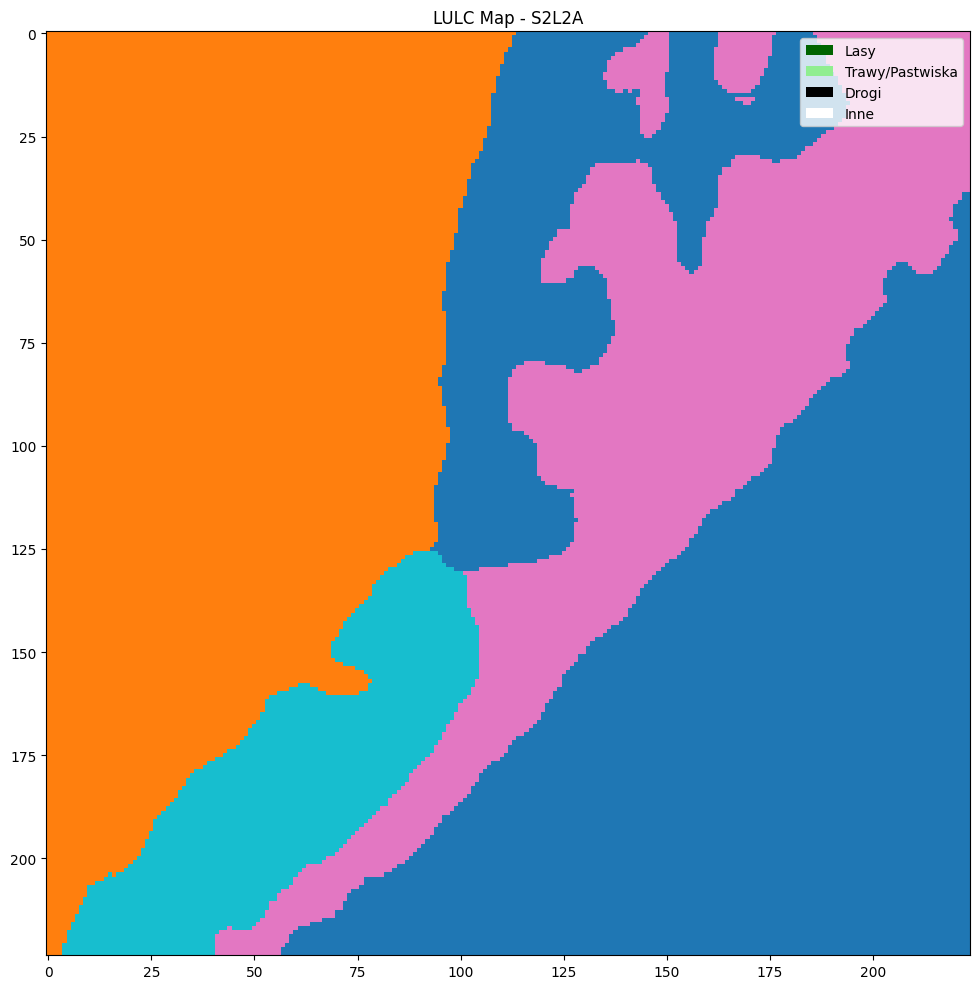

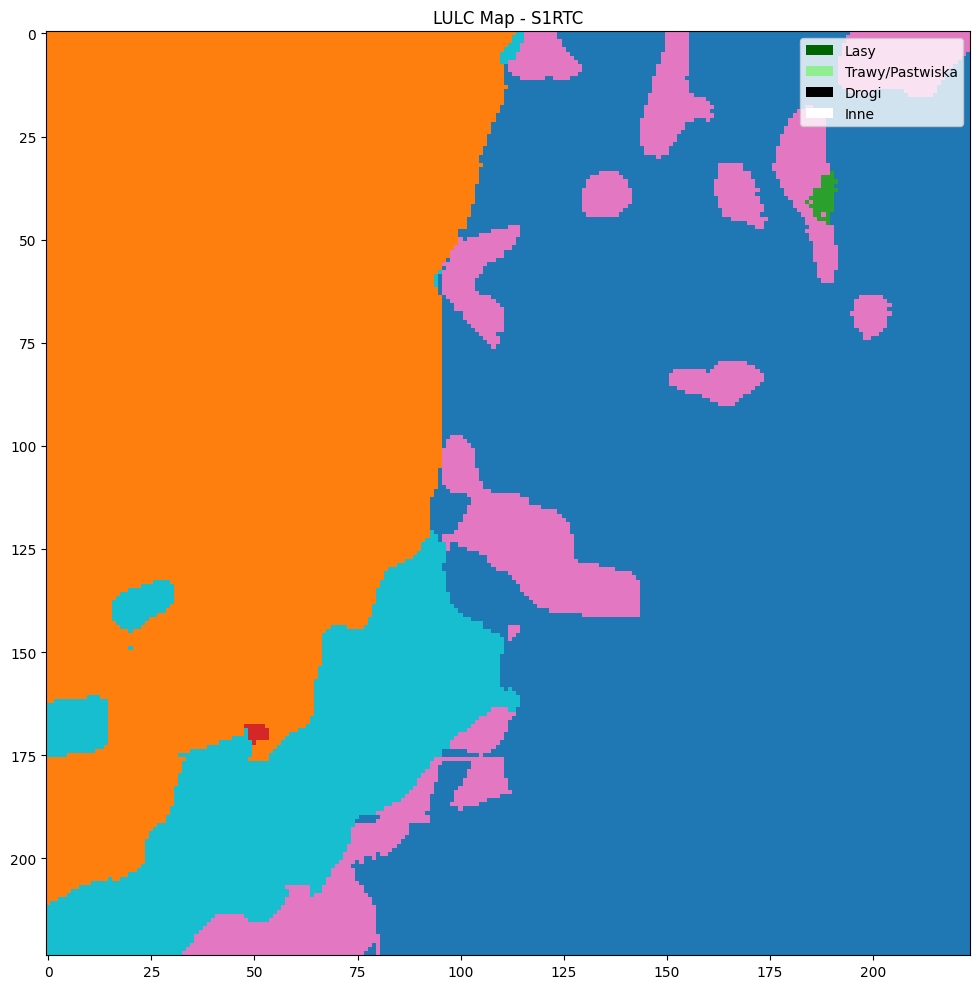

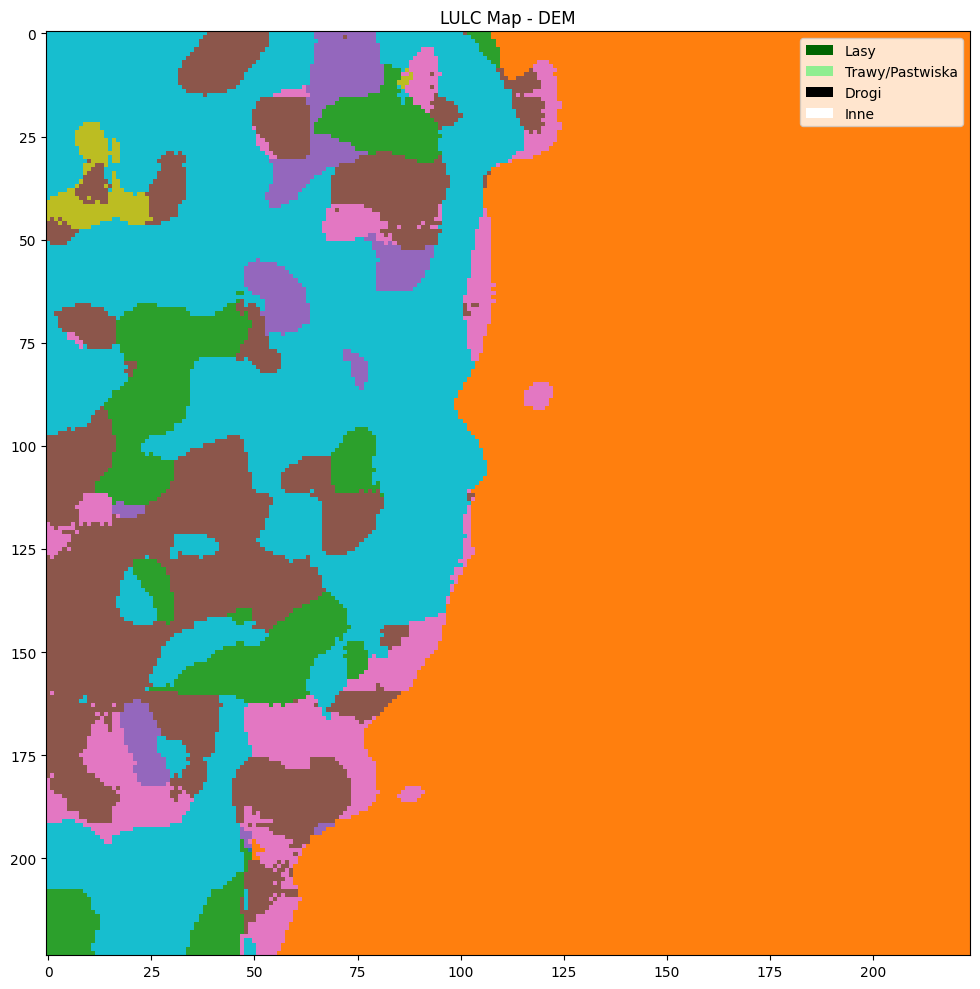

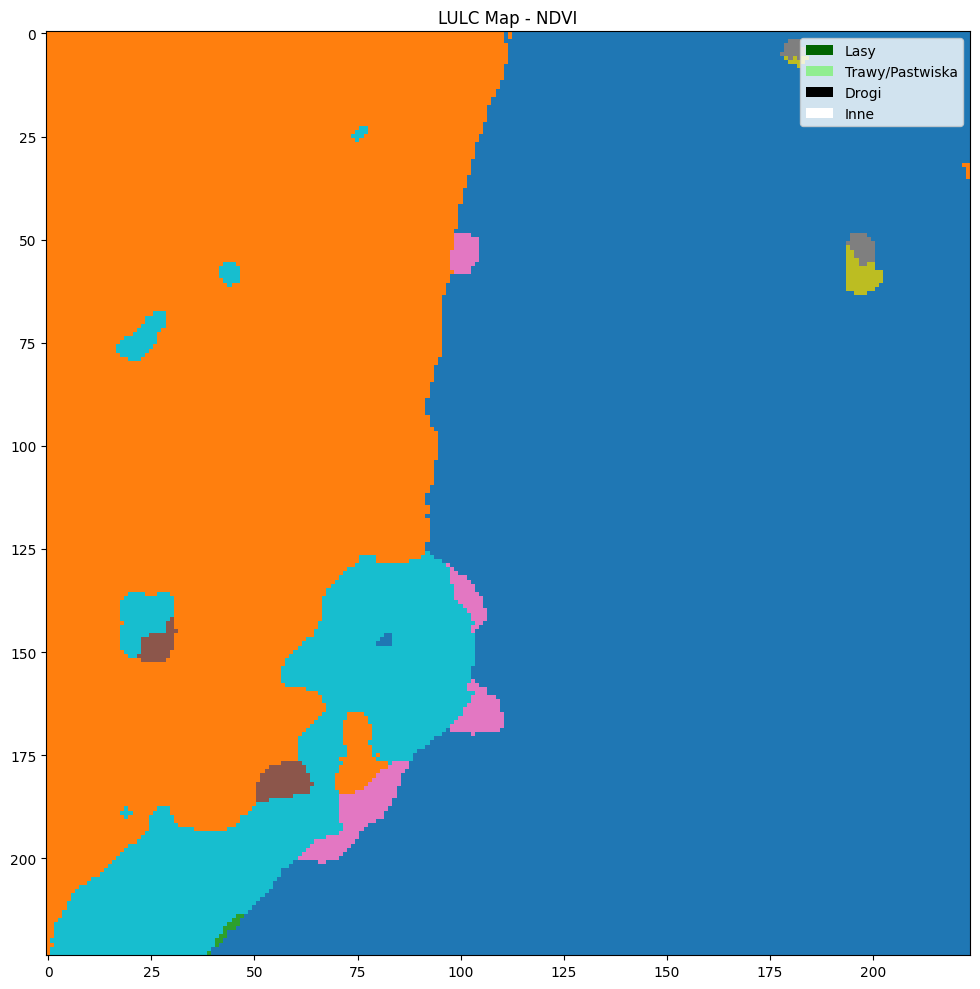

In [9]:
# Wyciągnij i wizualizuj mapę LULC
import matplotlib.patches as mpatches

# Definicja klas LULC i ich kolorów
lulc_classes = {
    #0: ('Woda', 'blue'),
    1: ('Lasy', 'darkgreen'),
    2: ('Trawy/Pastwiska', 'lightgreen'),
    #3: ('Pola uprawne', 'yellow'),
    #4: ('Zabudowa', 'red'),
    #5: ('Tereny zurbanizowane', 'gray'),
    6: ('Drogi', 'black'),
    9: ('Inne', 'white'),
}

# Funkcja do wizualizacji LULC
def visualize_lulc(lulc_tensor, title='LULC Map'):
    """Wizualizuj mapę LULC z kolorami"""
    # Konwertuj tensor do numpy
    lulc_np = lulc_tensor.squeeze().cpu().numpy()
    
    # Jeśli to softmax, weź argmax
    if lulc_np.ndim == 3:  # [C, H, W]
        lulc_np = lulc_np.argmax(axis=0)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(lulc_np, cmap='tab10')
    
    # Dodaj legendę
    patches = [mpatches.Patch(facecolor=color, label=label) 
               for label, color in lulc_classes.values()]
    ax.legend(handles=patches, loc='upper right')
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

# Wizualizuj LULC dla każdego modelu
for model_name, model_outputs in outputs.items():
    if 'LULC' in model_outputs:
        visualize_lulc(model_outputs['LULC'], title=f'LULC Map - {model_name}')

Struktura outputs: dict_keys(['S2L2A', 'S1RTC', 'DEM', 'LULC', 'NDVI'])
outputs['S2L2A'].keys(): dict_keys(['S1RTC', 'DEM', 'LULC', 'NDVI'])
Używane klasy: {1: 'Woda', 2: 'Lasy', 6: 'Piasek'}


C:\Users\MSI\AppData\Local\Temp\ipykernel_19976\4055192524.py:123: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10')


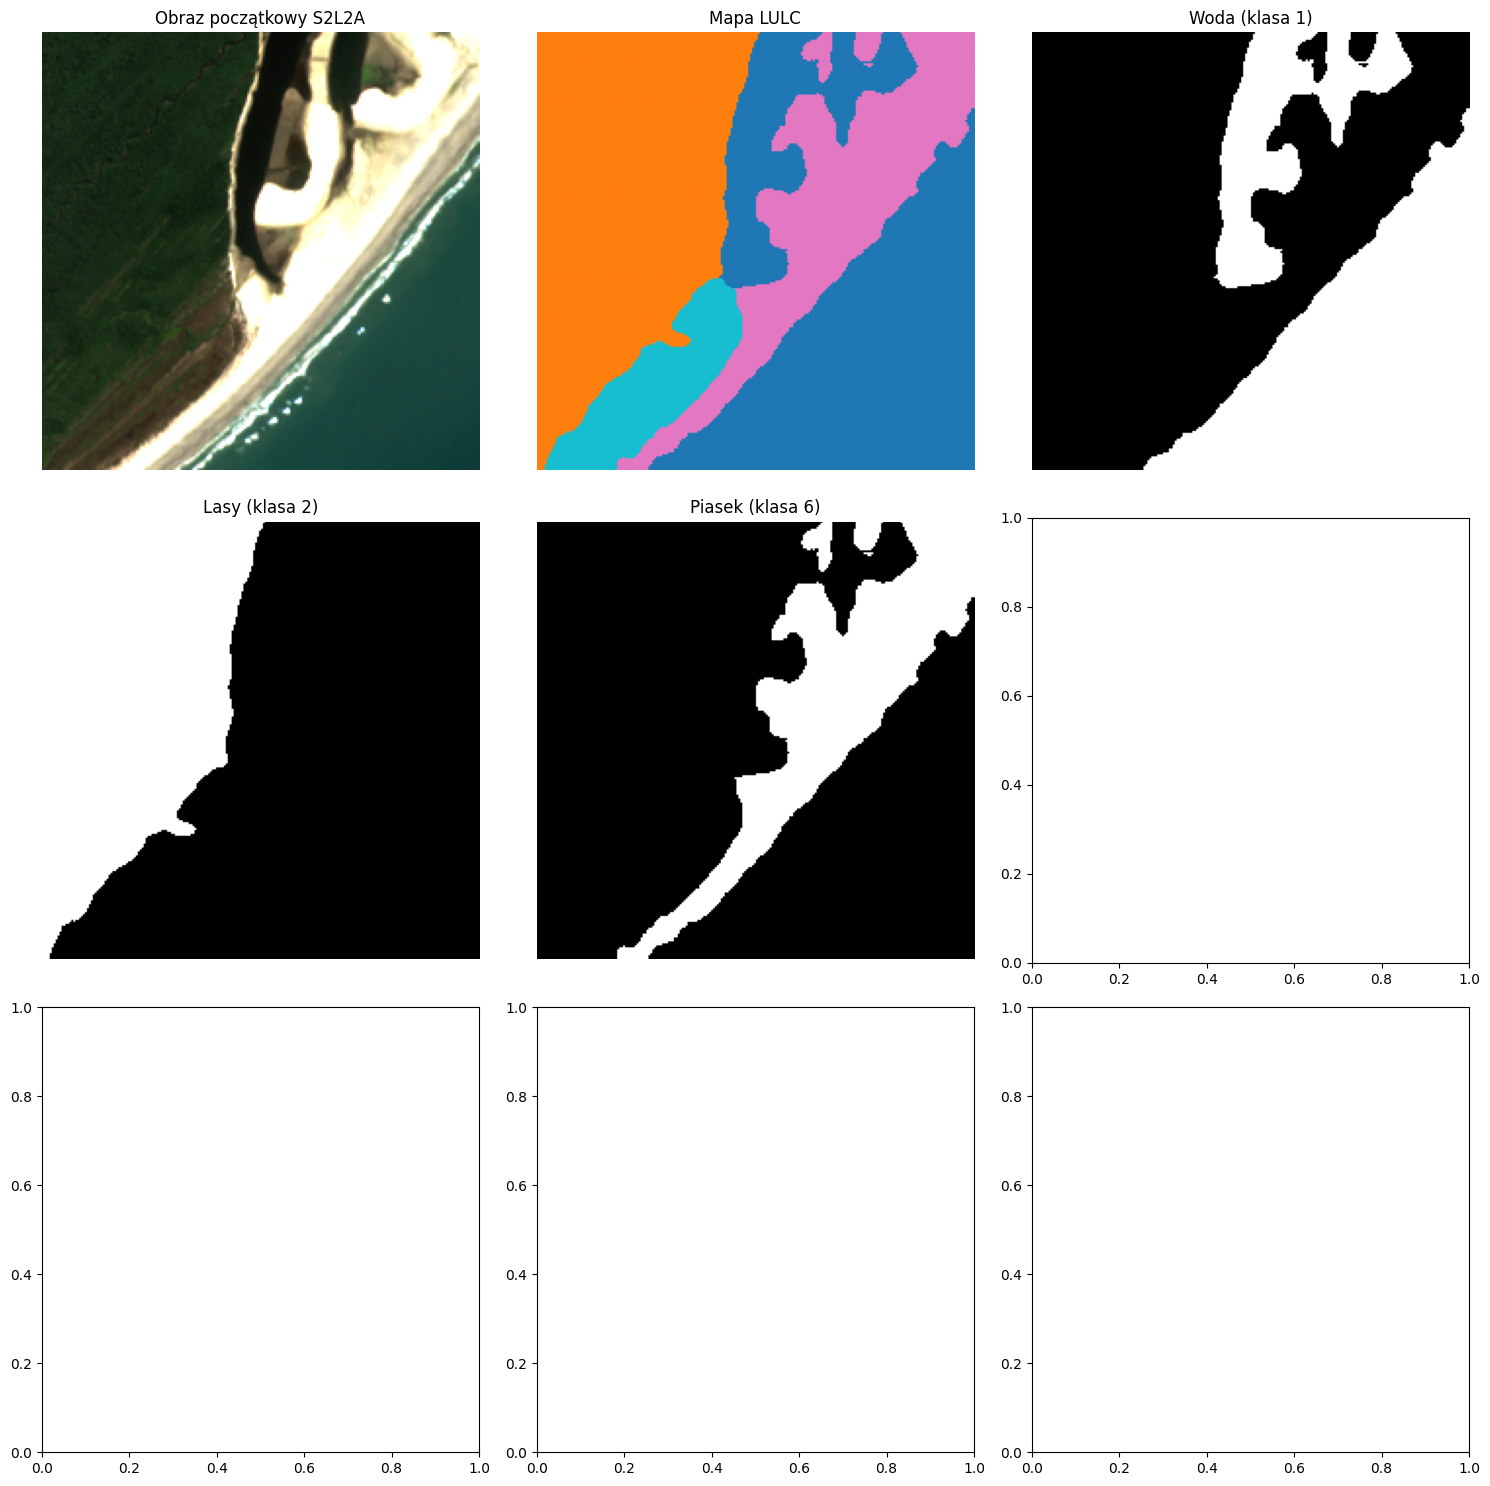

Zapisano: lulc_all_classes_S2L2A_282D_485L_3_3.tif.png


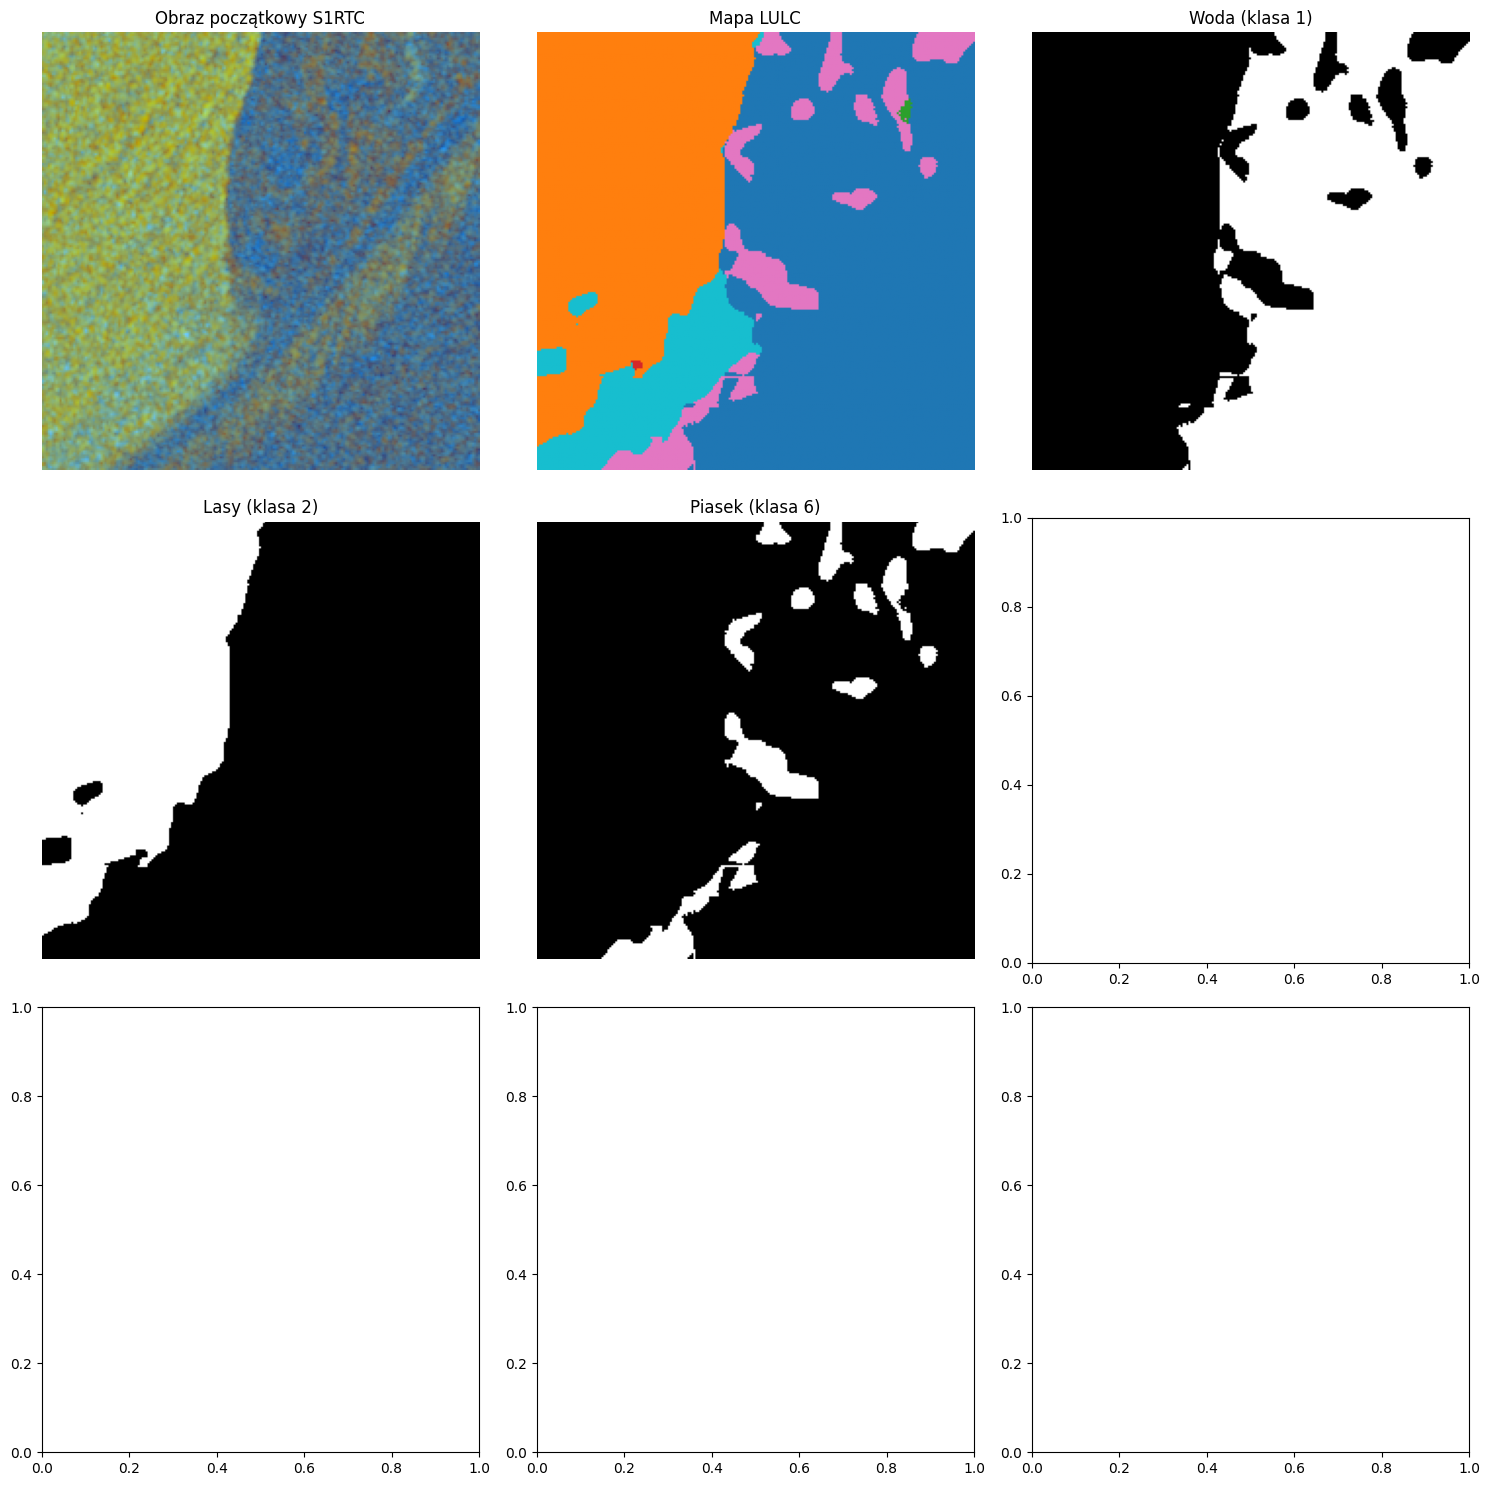

Zapisano: lulc_all_classes_S1RTC_282D_485L_3_3.tif.png


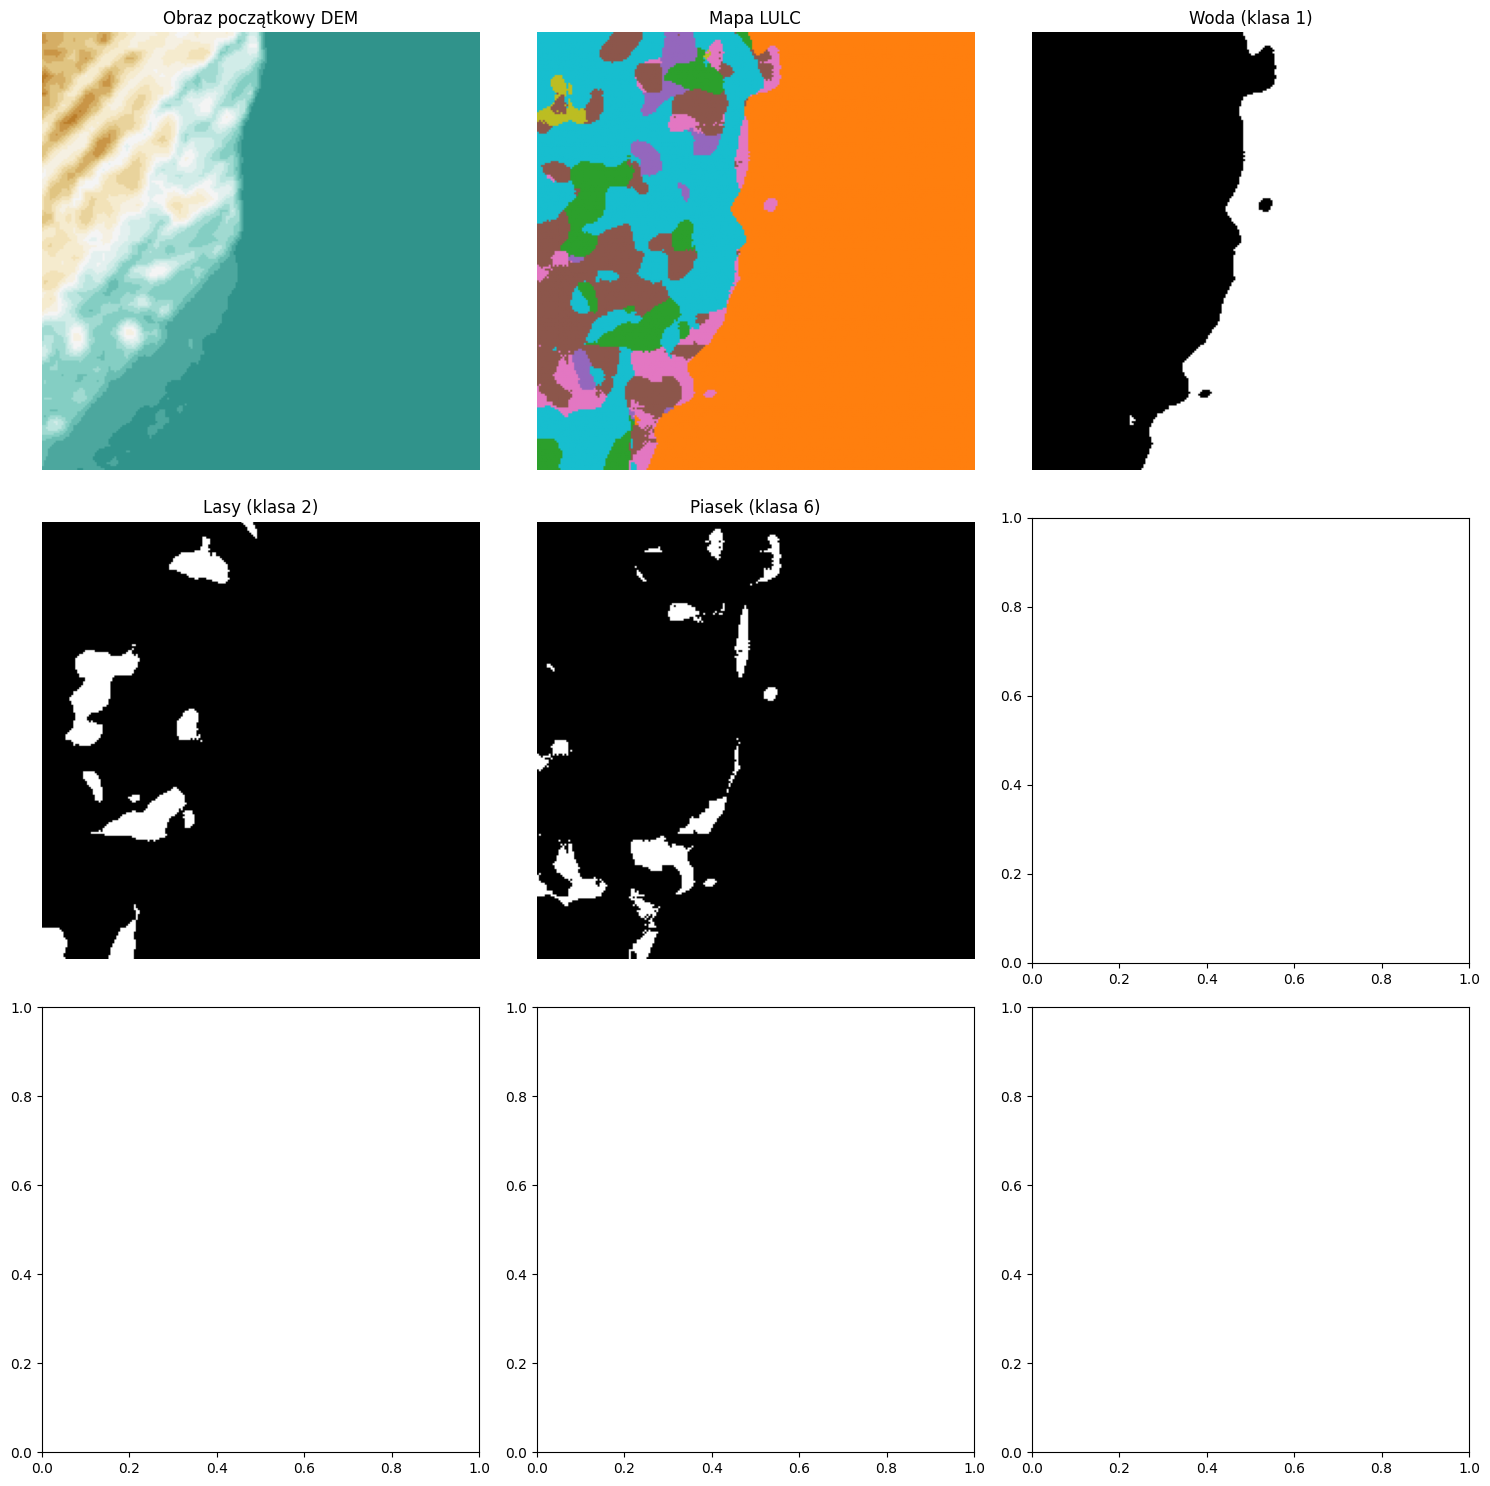

Zapisano: lulc_all_classes_DEM_282D_485L_3_3.tif.png
LULC nie istnieje w outputs['LULC']


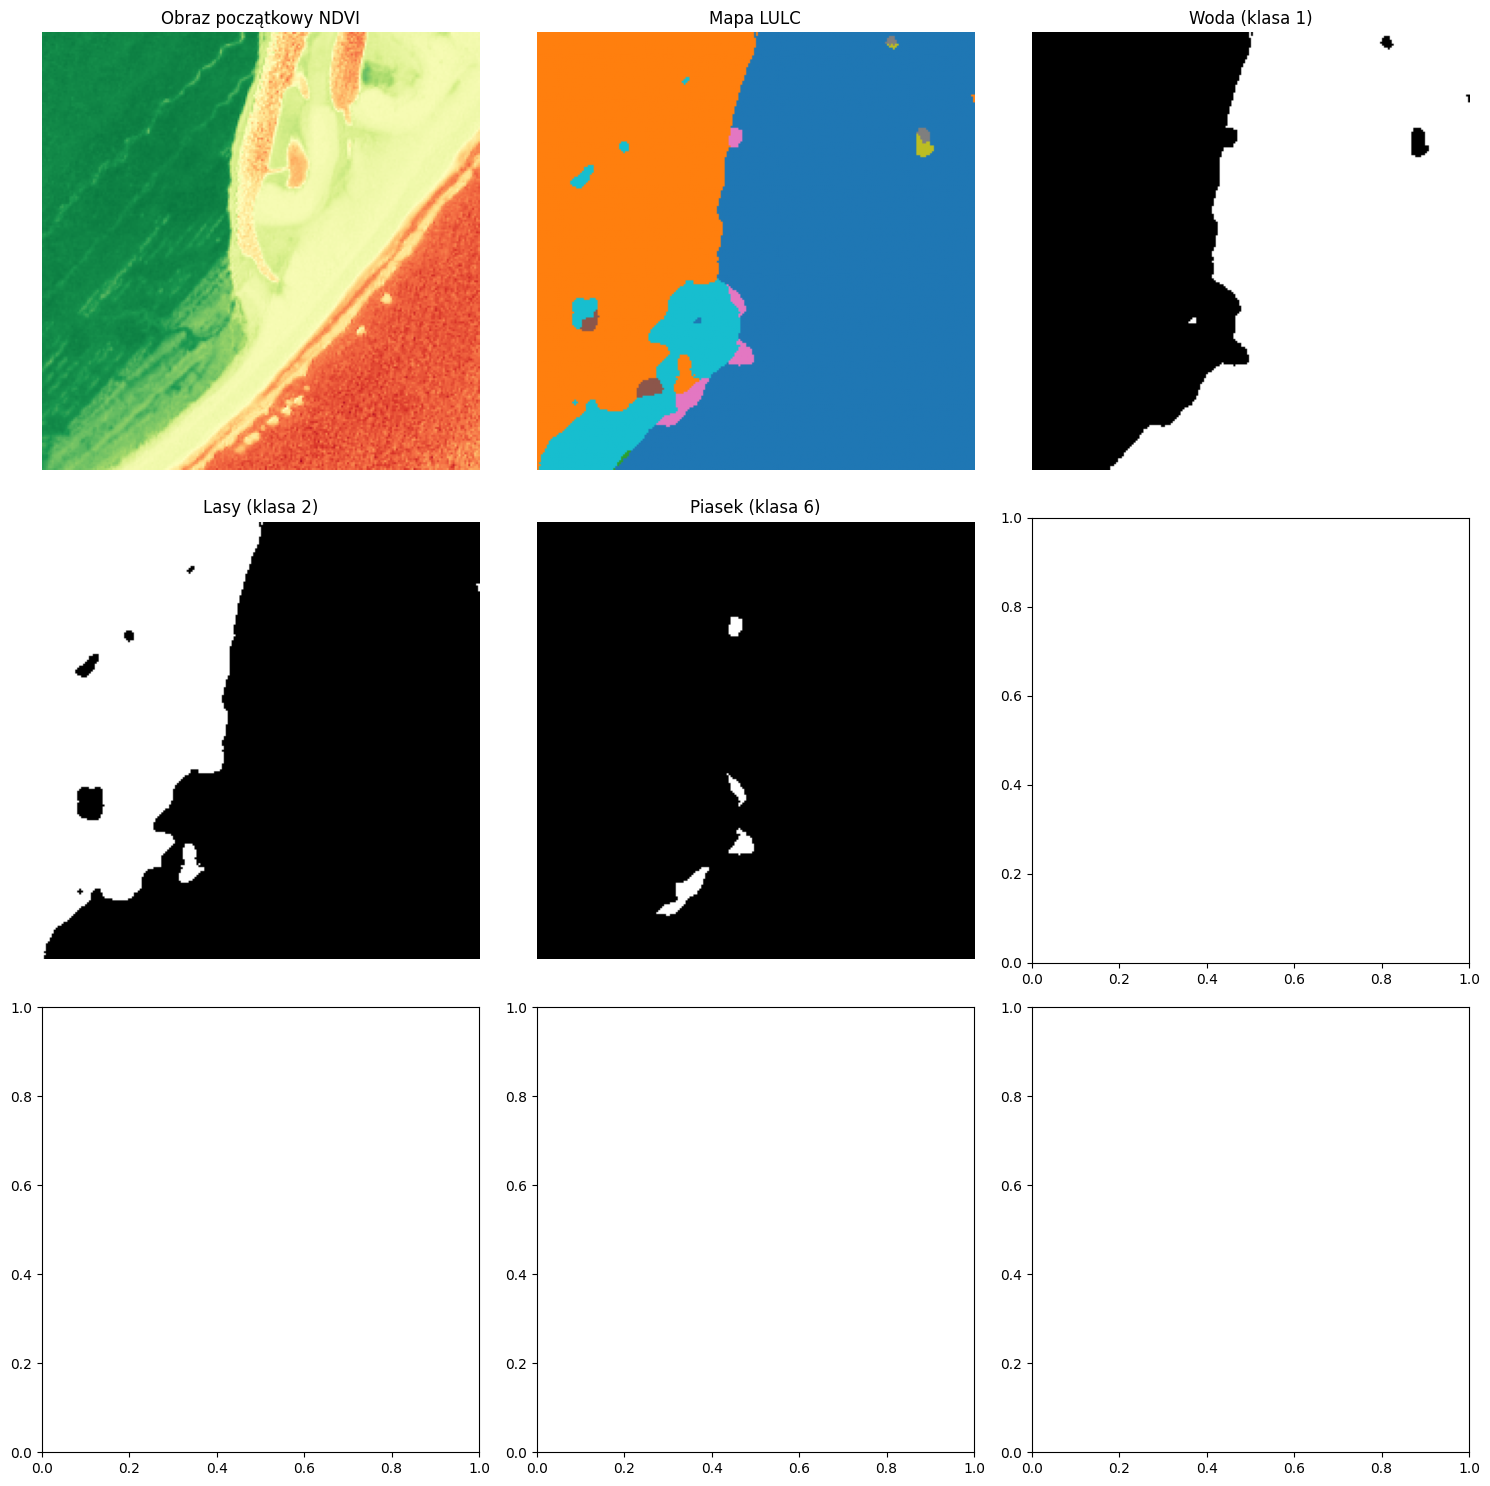

Zapisano: lulc_all_classes_NDVI_282D_485L_3_3.tif.png


In [13]:
# # Wyciągnij konkretne klasy
# def extract_class(lulc_tensor, class_id):
#     """Wyciągnij pikselę konkretnej klasy"""
#     lulc_np = lulc_tensor.squeeze().cpu().numpy()
#     if lulc_np.ndim == 3:
#         lulc_np = lulc_np.argmax(axis=0)
    
#     return (lulc_np == class_id).astype(int)

# # Sprawdź strukturę outputs
# print("Struktura outputs:", outputs.keys())
# print("outputs['S2L2A'].keys():", outputs['S2L2A'].keys())

# # Wyciągnij różne klasy LULC
# class_names = {
#     0: 'Woda',
#     1: 'Lasy',
#     2: 'Trawy/Pastwiska',
#     3: 'Pola uprawne',
#     4: 'Zabudowa',
#     5: 'Tereny zurbanizowane',
#     6: 'Drogi',
#     7: 'Inne'
# }

# # Iteruj po każdej modalności wejściowej i pokaż wygenerowaną LULC
# for modality in modalities:
#     # Sprawdź czy LULC istnieje w wygenerowanych danych
#     if 'LULC' in outputs[modality]:
#         lulc_data = outputs[modality]['LULC']

#         # Wizualizuj różne klasy + obraz początkowy
#         fig, axes = plt.subplots(3, 3, figsize=(15, 15))
#         axes = axes.flatten()

#         # Pokaż obraz początkowy
#         plot_modality(modality, data[modality], ax=axes[0])
#         axes[0].set_title(f'Obraz początkowy {modality}')
        
#         # Pokaż mapę LULC
#         lulc_np = lulc_data.squeeze().cpu().numpy()
#         if lulc_np.ndim == 3:
#             lulc_np = lulc_np.argmax(axis=0)
        
#         # Stwórz mapę kolorów dla wszystkich klas
#         cmap = plt.cm.get_cmap('tab10')
#         im = axes[1].imshow(lulc_np, cmap=cmap)
#         axes[1].set_title('Mapa LULC')
#         axes[1].axis('off')

#         # Pokaż każdą klasę osobno
#         for idx, (class_id, class_name) in enumerate(class_names.items(), start=2):
#             if idx < len(axes):
#                 class_map = extract_class(lulc_data, class_id=class_id)
#                 axes[idx].imshow(class_map, cmap='gray')
#                 axes[idx].set_title(f'{class_name} (klasa {class_id})')
#                 axes[idx].axis('off')

#         plt.tight_layout()
#         plt.savefig(f'lulc_all_classes_{modality}_{os.path.basename(file)}.png', dpi=150, bbox_inches='tight')
#         plt.show()

#         print(f"Zapisano: lulc_all_classes_{modality}_{os.path.basename(file)}.png")
#     else:
#         print(f"LULC nie istnieje w outputs['{modality}']")
# Wyciągnij konkretne klasy
def extract_class(lulc_tensor, class_id):
    """Wyciągnij pikselę konkretnej klasy"""
    lulc_np = lulc_tensor.squeeze().cpu().numpy()
    if lulc_np.ndim == 3:
        lulc_np = lulc_np.argmax(axis=0)
    
    return (lulc_np == class_id).astype(int)

# Sprawdź strukturę outputs
print("Struktura outputs:", outputs.keys())
print("outputs['S2L2A'].keys():", outputs['S2L2A'].keys())

# Dynamicznie określ klasy na podstawie tego co model generuje
lulc_data = outputs['S2L2A']['LULC']
lulc_np = lulc_data.squeeze().cpu().numpy()
if lulc_np.ndim == 3:
    lulc_np = lulc_np.argmax(axis=0)

unique_classes = np.unique(lulc_np)

# Mapowanie klas - zmień na podstawie tego co wypisało
class_names = {
    0: 'idk',
    1: 'Woda',
    2: 'Lasy',
    3: 'Pola uprawne',
    4: 'Zabudowa',
    5: 'Tereny zurbanizowane',
    6: 'Piasek',
    7: 'Inne'
}

# Użyj tylko klas które rzeczywiście występują
class_names = {k: v for k, v in class_names.items() if k in unique_classes}
print(f"Używane klasy: {class_names}")

# Iteruj po każdej modalności wejściowej i pokaż wygenerowaną LULC
for modality in modalities:
    # Sprawdź czy LULC istnieje w wygenerowanych danych
    if 'LULC' in outputs[modality]:
        lulc_data = outputs[modality]['LULC']

        # Wizualizuj różne klasy + obraz początkowy
        fig, axes = plt.subplots(3, 3, figsize=(15, 15))
        axes = axes.flatten()

        # Pokaż obraz początkowy
        plot_modality(modality, data[modality], ax=axes[0])
        axes[0].set_title(f'Obraz początkowy {modality}')
        
        # Pokaż mapę LULC
        lulc_np = lulc_data.squeeze().cpu().numpy()
        if lulc_np.ndim == 3:
            lulc_np = lulc_np.argmax(axis=0)
        
        # Stwórz mapę kolorów dla wszystkich klas
        cmap = plt.cm.get_cmap('tab10')
        im = axes[1].imshow(lulc_np, cmap=cmap)
        axes[1].set_title('Mapa LULC')
        axes[1].axis('off')

        # Pokaż każdą klasę osobno
        for idx, (class_id, class_name) in enumerate(class_names.items(), start=2):
            if idx < len(axes):
                class_map = extract_class(lulc_data, class_id=class_id)
                axes[idx].imshow(class_map, cmap='gray')
                axes[idx].set_title(f'{class_name} (klasa {class_id})')
                axes[idx].axis('off')

        plt.tight_layout()
        plt.savefig(f'lulc_all_classes_{modality}_{os.path.basename(file)}.png', dpi=150, bbox_inches='tight')
        plt.show()

        print(f"Zapisano: lulc_all_classes_{modality}_{os.path.basename(file)}.png")
    else:
        print(f"LULC nie istnieje w outputs['{modality}']")